# Logistic Regression (Binary Classification)

Logistic Regression is a binary classification model that predicts the probability of an instance belonging to one of two classes. 

It uses a logistic function and optimized coefficients to learn the relationship between input features and the binary outcome. 

The model is trained on a labeled dataset and applies a threshold to predict class membership. Evaluation metrics like accuracy, precision, recall, and F1 score assess its performance. 

Logistic Regression is commonly used for tasks like medical diagnosis, spam detection, and customer churn prediction.

In [1]:
#Importing Required Libraries
import pandas as pd  #for create dataframes
from matplotlib import pyplot as plt  #for visualization
from sklearn.model_selection import train_test_split #for splitting data into train-test data
%matplotlib inline

In [2]:
#importing dataset
df=pd.read_csv('insurance_data.csv') 

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


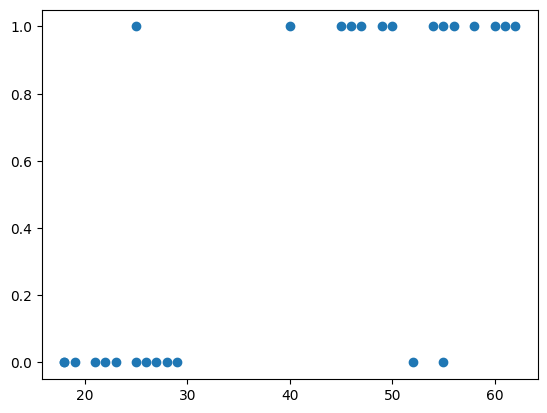

In [4]:
#scatter plotting
plt.scatter(df.age,df.bought_insurance)

In [5]:
#define X and Y
x=df[['age']]
y=df['bought_insurance']

In [6]:
#splitting the data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [7]:
x_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [8]:
#importing Logistic regression model
from sklearn.linear_model import LogisticRegression

In [9]:
#create model
model=LogisticRegression()

In [10]:
#fitting data into model
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
# calculating prediction on testing data(unseen data)
model.predict(x_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
#calculating accuracy of the model
model.score(x_test,y_test)

1.0

In [13]:
#calculating probability of class on testing data
model.predict_proba(x_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [14]:
model.predict([[70]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Exercise

In [15]:
new_df=pd.read_csv('HR.csv')

In [16]:
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

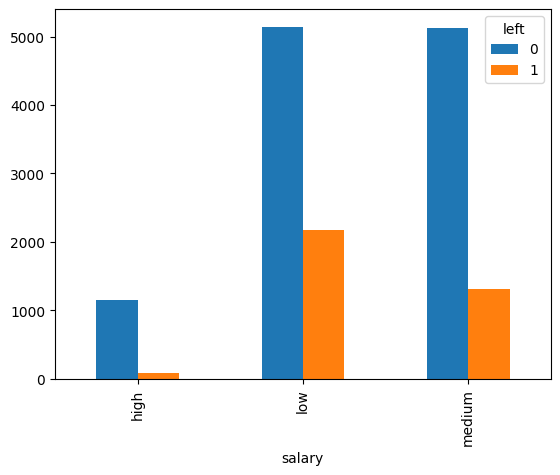

In [17]:
pd.crosstab(new_df.salary,new_df.left).plot(kind='bar')

In [18]:
#preprocess the data
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
new_df.Department=le.fit_transform(new_df.Department)
new_df.salary=le.fit_transform(new_df.salary)

In [21]:
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [22]:
x=new_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']]

In [23]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [24]:
y=new_df['left']

In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
new_model=LogisticRegression()

In [30]:
new_model.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
new_model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [32]:
new_model.score(x_test,y_test)

0.763